# Лабораторная работа № 3. ТМО.

# Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей.

## Цель лабораторной работы: 
изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

## Задание:

1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
5. Произведите подбор гиперпараметра K с использованием GridSearchCV и RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Используйте не менее двух стратегий кросс-валидации.
6. Сравните метрики качества исходной и оптимальной моделей.

### Импорт библиотек

In [95]:
import sys
sys.path
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

## Загрузка данных

Для третьей лабораторной работы по ТМО я взял датасет с классификацией Exam Scores, который содержит оценки учащихся по различным предметам (математике, чтению, письму), а также другие данные о них, такие как пол, этническая принадлежность и тип ланча.

Данный набор данных содержит:

##### Контекст
Оценки, полученные студентами

##### Содержание
Этот набор данных состоит из оценок, полученных учащимися по различным предметам.

##### Признание
http://roycekimmons.com/tools/generated_data/exams

##### Вдохновение
Понять влияние образования родителей, подготовки к тестированию и т.д. на успеваемость учащихся.

#### Загрузим данные:

In [96]:
df = pd.read_csv('StudentsPerformance.csv')

### Основные характеристики датасета

In [97]:
# Выведем первые 5 строк из выбранного датасета.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [98]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))
total_count = df.shape[1]
print('Всего колонок: {}'.format(total_count))

Всего строк: 1000
Всего колонок: 8


In [99]:
# Выведем список колонок с типами данных.
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

### Проверка на пустые значения в датасете

In [100]:
for col_empty in df.columns:
    empty_count = df[df[col_empty].isnull()].shape[0]
    print('{} - {}'.format(col_empty, empty_count))

gender - 0
race/ethnicity - 0
parental level of education - 0
lunch - 0
test preparation course - 0
math score - 0
reading score - 0
writing score - 0


Проверил количество пустых значений по колонкам. Количество пустых значений означает, что все значения по этим колонкам заполнены.

In [101]:
# Проверка на пропущенные данные
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

В моем случае удалять или заполнять пропуски не надо.

### math score Vs reading score

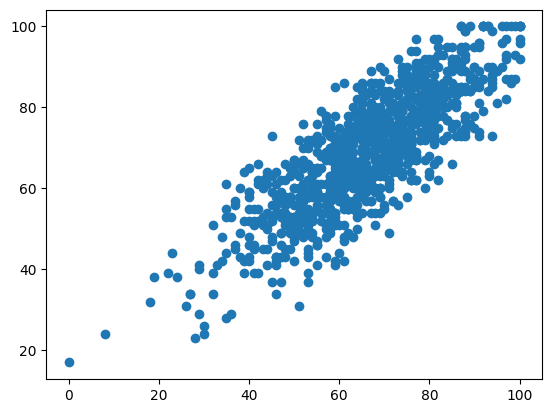

In [102]:
plt.scatter(df['math score'],df['reading score'])

### math score Vs writing score

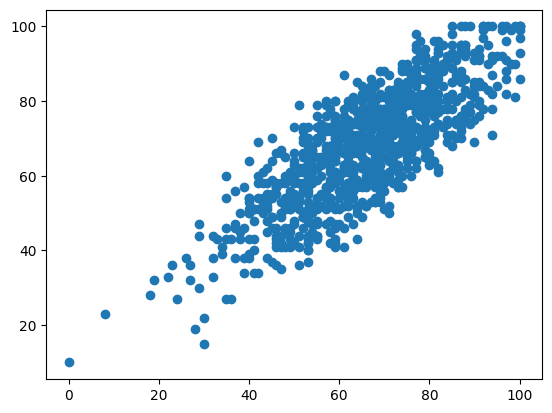

In [103]:
plt.scatter(df['math score'],df['writing score'])

In [104]:
X = df[['reading score', 'writing score']]
Y = df['math score']

In [105]:
# Выведем по оси абсцисс. 
X

,reading score,writing score
0,72,74
1,90,88
2,95,93
3,57,44
4,78,75
...,...,...
995,99,95
996,55,55
997,71,65
998,78,77


In [106]:
# Выведем по оси ординат. 
Y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: int64

### Разделение выборки на обучающую и тестовую

In [107]:
from sklearn.model_selection import train_test_split

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [109]:
# Вернет 80% от общего размера данных
len(X_train)

800

In [110]:
len(X_test)

200

In [111]:
X_train

,reading score,writing score
848,72,68
479,71,67
697,72,70
233,87,78
48,74,76
...,...,...
882,73,71
485,74,71
968,76,67
44,56,54


In [112]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=10)

In [113]:
X_train

,reading score,writing score
188,52,45
194,84,85
225,56,54
580,97,96
428,59,53
...,...,...
320,79,84
527,53,43
996,55,55
125,95,86


In [114]:
# Используем нашу модель линейной регресии
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [115]:
# Обучим нашу модель
clf.fit(X_train,Y_train)

LinearRegression()

In [116]:
clf.predict(X_test)

array([54.61232621, 79.92264417, 61.59932177, 65.053584  , 72.88848925,
       56.95176198, 84.05202628, 62.19597055, 48.8970993 , 85.04122229,
       80.99031128, 54.21977898, 77.00221549, 63.24798179, 64.25283367,
       67.83272635, 79.53009694, 76.27993626, 65.58741756, 67.64428068,
       80.06393049, 64.00157277, 61.20677454, 71.02007181, 69.16731024,
       82.45052562, 74.14460204, 63.38926811, 79.71854261, 78.93344816,
       91.4159132 , 60.93985777, 52.82237986, 59.0086251 , 58.14505954,
       67.17326235, 87.23937174, 43.66854661, 92.15384831, 64.99076878,
       70.83162613, 52.22573108, 82.32489517, 72.88848925, 71.09854291,
       81.39851438, 59.40117233, 45.5841234 , 84.24047196, 51.83318386,
       67.58146545, 56.74766043, 64.78666723, 68.36655991, 81.38285851,
       39.14661726, 73.89334114, 65.25768556, 83.51819273, 52.75956464,
       75.14945392, 86.31299095, 45.25439139, 59.46398755, 65.44613123,
       54.54951098, 57.94095799, 77.33194749, 74.47433404, 68.36

In [117]:
Y_test

841    64
956    84
544    64
173    63
759    69
       ..
274    88
192    62
398    74
450    64
520    71
Name: math score, Length: 200, dtype: int64

In [118]:
clf.score(X_test,Y_test)

0.6607456209385417

Означает, что точность составляет 66%

In [119]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [120]:
scaler = MinMaxScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_train.describe()

,reading score,writing score
count,800.000000,800.000000
mean,0.626280,0.643222
std,0.174577,0.169077
min,0.000000,0.000000
25%,0.506024,0.522222
50%,0.638554,0.655556
75%,0.746988,0.755556
max,1.000000,1.000000


### Обучение KNN с произвольным k

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor

In [122]:
def print_metrics(Y_test, Y_pred):
    print(f"R^2: {r2_score(Y_test, Y_pred)}")
    print(f"MSE: {mean_squared_error(Y_test, Y_pred)}")
    print(f"MAE: {mean_absolute_error(Y_test, Y_pred)}")

In [123]:
def print_cv_result(cv_model, X_test, Y_test):
    print(f'Оптимизация метрики {cv_model.scoring}: {cv_model.best_score_}')
    print(f'Лучший параметр: {cv_model.best_params_}')
    print('Метрики на тестовом наборе')
    print_metrics(Y_test, cv_model.predict(X_test))
    print()

In [124]:
base_k = 7
base_knn = KNeighborsRegressor(n_neighbors=base_k)
base_knn.fit(X_train, Y_train)
Y_pred_base = base_knn.predict(X_test)
print(f'Test metrics for KNN with k={base_k}\n')
print_metrics(Y_test, Y_pred_base)

Test metrics for KNN with k=7

R^2: 0.6030122487760627
MSE: 82.91683673469386
MAE: 7.663571428571429


### Кросс-валидация

In [125]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [126]:
metrics = ['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error']
cv_values = [5, 10]

for cv in cv_values:
    print(f'Результаты кросс-валидации при cv={cv}\n')
    for metric in metrics:    
        params = {'n_neighbors': range(1, 30)}
        knn_cv = GridSearchCV(KNeighborsRegressor(), params, cv=cv, scoring=metric, n_jobs=-1)
        knn_cv.fit(X_train, Y_train)
        print_cv_result(knn_cv, X_test, Y_test)

Результаты кросс-валидации при cv=5

Оптимизация метрики r2: 0.6472794612810335
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.648832033872066
MSE: 73.34668846611177
MAE: 7.142586206896551

Оптимизация метрики neg_mean_squared_error: -81.75816884661117
Лучший параметр: {'n_neighbors': 29}
Метрики на тестовом наборе
R^2: 0.648832033872066
MSE: 73.34668846611177
MAE: 7.142586206896551

Оптимизация метрики neg_mean_absolute_error: -7.281544117647059
Лучший параметр: {'n_neighbors': 17}
Метрики на тестовом наборе
R^2: 0.622707027843075
MSE: 78.80328719723184
MAE: 7.406470588235295

Результаты кросс-валидации при cv=10

Оптимизация метрики r2: 0.6392084499907589
Лучший параметр: {'n_neighbors': 26}
Метрики на тестовом наборе
R^2: 0.6446175206603122
MSE: 74.2269526627219
MAE: 7.222307692307693

Оптимизация метрики neg_mean_squared_error: -82.06158284023668
Лучший параметр: {'n_neighbors': 26}
Метрики на тестовом наборе
R^2: 0.6446175206603122
MSE: 74.2269526627219
MAE

In [127]:
best_k = 4
Y_pred_best = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, Y_train).predict(X_test)

### Сравнение исходной и оптимальной моделей

In [128]:
print('Basic model\n')
print_metrics(Y_test, Y_pred_base)
print('_______________________')
print('\nOptimal model\n')
print_metrics(Y_test, Y_pred_best)

Basic model

R^2: 0.6030122487760627
MSE: 82.91683673469386
MAE: 7.663571428571429
_______________________

Optimal model

R^2: 0.5655611358486505
MSE: 90.7390625
MAE: 7.94125


### Визуализация оптимальной модели

In [129]:
res = pd.DataFrame({'Y_test': Y_test, 'Y_pred_best': Y_pred_best}).sort_values(by='Y_test')
res.head()

,Y_test,Y_pred_best
601,29,33.00
339,35,57.25
211,35,23.00
862,39,34.25
298,40,48.00


In [133]:
plt.figure(figsize=(16, 5))
sns.scatterplot(range(res.shape[0]), res['Y_test'], label='actual')
sns.scatterplot(range(res.shape[0]), res['Y_pred_best'], label='predicted', alpha=0.6)
plt.ylabel('price')
plt.xlabel('')
plt.title(f'Best KNN model results (k={best_k})')
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.show()

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1600x500 with 0 Axes>